In [4]:
import wget
import zipfile

url = 'https://www.kaggle.com/api/v1/datasets/download/neelagiriaditya/ufc-datasets-1994-2025'
wget.download(url, '../data.zip')

with zipfile.ZipFile('../data.zip', 'r') as zip_ref:
  zip_ref.extractall('../data')

In [15]:
import pandas as pd

csv_file = pd.read_csv('../data/fight_details.csv')
csv_file.describe()

,title_fight,finish_round,match_time_sec,total_rounds,r_kd,r_sig_str_landed,r_sig_str_atmpted,r_sig_str_acc,r_total_str_landed,r_total_str_atmpted,...,b_clinch_acc,b_ground_landed,b_ground_atmpted,b_ground_acc,b_landed_head_per,b_landed_body_per,b_landed_leg_per,b_landed_dist_per,b_landed_clinch_per,b_landed_ground_per
count,8337.000000,8337.000000,8337.000000,8306.000000,8316.000000,8316.000000,8316.000000,8278.000000,8316.000000,8316.000000,...,6295.000000,8316.000000,8316.000000,4521.000000,8316.000000,8316.000000,8316.000000,8316.000000,8316.000000,8316.000000
mean,0.055176,2.353604,228.060813,3.135805,0.243867,39.152718,85.061688,47.850568,58.877345,107.661015,...,66.891183,3.761424,5.500722,68.764433,58.030904,19.989779,18.155604,69.091871,14.610149,12.656325
std,0.228337,1.017928,97.303021,0.649625,0.515477,33.115821,71.532433,16.034901,45.885120,79.761970,...,28.587176,7.840983,11.059512,29.116998,25.603450,17.412798,19.970871,29.603009,19.111566,21.659414
min,0.000000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,152.000000,3.000000,0.000000,14.000000,29.000000,37.000000,22.000000,41.000000,...,50.000000,0.000000,0.000000,50.000000,43.000000,8.000000,3.000000,50.000000,0.000000,0.000000
50%,0.000000,3.000000,291.000000,3.000000,0.000000,31.000000,68.000000,47.000000,51.000000,96.000000,...,70.000000,1.000000,1.000000,71.000000,61.000000,17.000000,12.000000,78.000000,7.000000,0.000000
75%,0.000000,3.000000,300.000000,3.000000,0.000000,56.000000,122.000000,57.000000,84.000000,157.000000,...,91.000000,4.000000,6.000000,100.000000,76.000000,28.000000,27.000000,94.000000,21.000000,16.000000
max,1.000000,5.000000,1080.000000,5.000000,5.000000,445.000000,744.000000,100.000000,447.000000,746.000000,...,100.000000,136.000000,163.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [16]:
csv_file.head()

,event_name,event_id,fight_id,r_name,r_id,b_name,b_id,division,title_fight,method,...,b_clinch_acc,b_ground_landed,b_ground_atmpted,b_ground_acc,b_landed_head_per,b_landed_body_per,b_landed_leg_per,b_landed_dist_per,b_landed_clinch_per,b_landed_ground_per
0,UFC Fight Night: Imavov vs. Borralho,6e380a4d73ab4f0e,d14fea43712707f0,Benoit Saint Denis,c2299ec916bc7c56,Mauricio Ruffy,9c393e836a852f30,lightweight,0,Submission,...,NaN,0.0,0.0,NaN,80.0,20.0,0.0,100.0,0.0,0.0
1,UFC Fight Night: Imavov vs. Borralho,6e380a4d73ab4f0e,5bcd8abf6da01dae,Nassourdine Imavov,881bf86d4cba8578,Caio Borralho,4126a78111c0855a,middleweight,0,Decision - Unanimous,...,100.0,0.0,0.0,NaN,59.0,21.0,19.0,89.0,10.0,0.0
2,UFC Fight Night: Imavov vs. Borralho,6e380a4d73ab4f0e,0149e875b31e57f8,Modestas Bukauskas,476fe566d2df676e,Paul Craig,eabf206b162b3b83,light heavyweight,0,KO/TKO,...,100.0,0.0,0.0,NaN,0.0,33.0,66.0,83.0,16.0,0.0
3,UFC Fight Night: Imavov vs. Borralho,6e380a4d73ab4f0e,69b31593175f77ec,Bolaji Oki,4bdedbdeedff7d1d,Mason Jones,f6ad6a1e4d600e0d,lightweight,0,KO/TKO,...,67.0,32.0,49.0,65.0,91.0,3.0,5.0,40.0,3.0,56.0
4,UFC Fight Night: Imavov vs. Borralho,6e380a4d73ab4f0e,a47123ae6e048f11,Axel Sola,1d2d98ddd05b38fb,Rhys McKee,f748267c4ab6c127,welterweight,0,KO/TKO,...,53.0,0.0,0.0,NaN,81.0,18.0,0.0,69.0,30.0,0.0


In [63]:
events_file = pd.read_csv('../data/event_details.csv')

df_holloway = pd.concat([
    csv_file.loc[csv_file["r_name"] == "Max Holloway", ["fight_id", "b_name", "r_sig_str_atmpted", "total_rounds"]].rename(columns={"r_id": "id", "b_name": "vs", "r_sig_str_atmpted": "sig_str_atmpted"}),
    csv_file.loc[csv_file["b_name"] == "Max Holloway", ["fight_id", "r_name", "b_sig_str_atmpted", "total_rounds"]].rename(columns={"b_id": "id", "r_name": "vs", "b_sig_str_atmpted": "sig_str_atmpted"})
], ignore_index=True)

max_holloway_stats = pd.merge(
  events_file[['fight_id', 'location', 'date', 'winner']],
  df_holloway[['fight_id', 'vs', 'sig_str_atmpted', 'total_rounds']],
  on="fight_id",
  how="inner"
)
max_holloway_stats['date'] = pd.to_datetime(max_holloway_stats.loc[:, 'date'])

max_holloway_stats

,fight_id,location,date,winner,vs,sig_str_atmpted,total_rounds
0,d7507e2741fd4d05,"New Orleans, Louisiana, USA",2025-07-19,Max Holloway,Dustin Poirier,375.0,5.0
1,ebf7cea27b83c432,"Abu Dhabi, Abu Dhabi, United Arab Emirates",2024-10-26,Ilia Topuria,Ilia Topuria,204.0,5.0
2,cf5e8f98159c3971,"Las Vegas, Nevada, USA",2024-04-13,Max Holloway,Justin Gaethje,309.0,5.0
3,96704d7ba3a452d9,"Kallang, Singapore",2023-08-26,Max Holloway,Chan Sung Jung,128.0,5.0
4,6049301b4deea035,"Kansas City, Missouri, USA",2023-04-15,Max Holloway,Arnold Allen,262.0,5.0
5,4047e98132306cd5,"Las Vegas, Nevada, USA",2022-07-02,Alexander Volkanovski,Alexander Volkanovski,301.0,5.0
6,147e984aa34e3028,"Las Vegas, Nevada, USA",2021-11-13,Max Holloway,Yair Rodriguez,404.0,5.0
7,a4817b7e46028b4a,"Abu Dhabi, Abu Dhabi, United Arab Emirates",2021-01-16,Max Holloway,Calvin Kattar,744.0,5.0
8,94b1596c6ff9a25d,"Abu Dhabi, Abu Dhabi, United Arab Emirates",2020-07-11,Alexander Volkanovski,Alexander Volkanovski,268.0,5.0
9,efc40ec41114d8fa,"Las Vegas, Nevada, USA",2019-12-14,Alexander Volkanovski,Alexander Volkanovski,303.0,5.0


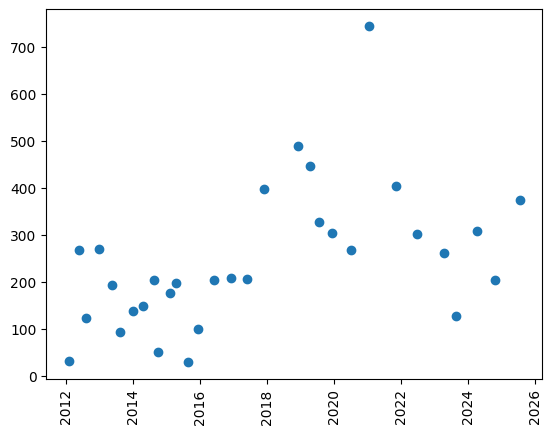

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.xticks(rotation=90)
_ = ax.scatter(max_holloway_stats['date'], max_holloway_stats['sig_str_atmpted'])

In [69]:
a = max_holloway_stats.set_index('date')
a.loc['2024']

,fight_id,location,winner,vs,sig_str_atmpted,total_rounds
date,,,,,,
2024-10-26,ebf7cea27b83c432,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Ilia Topuria,Ilia Topuria,204.0,5.0
2024-04-13,cf5e8f98159c3971,"Las Vegas, Nevada, USA",Max Holloway,Justin Gaethje,309.0,5.0
